 # ESTADÍSTICA 2.  PRÁCTICA 3.
 ## Autor: Jesús Octavio Raboso.
 
Los enunciados del ejercicio aparecerán en negrita, cursiva y color azul. El resto de anotaciones (explicativas y personales) no seguirán ese estilo.

Cuando hablo de *resultados teóricos o analíticos* me refiero a los desarrollos vistos en teoría; a funciones creadas con duchos desarrollos que no hacen uso de métodos propios de `R` como pueden ser la función `lm()`.

* (24/11/2021) Envío por correo.

<font color='blue'>***1.- Crea una función como la del ejercicio 2 en la que se pase como input: un vector x con la variable independiente, un parámetro “a”, un parámetro “b” y un valor “sigma”; y que devuelva un vector “y” que esté distribuido como una función normal con media = a*x + b y sigma = “sigma”.***</font>

**No confundir esos parámetros $a$, $b$ con los de la recta de regresión en futuros apartados.**

Tenemos un modelo en el que $p(y|x)$ tiene la siguiente forma:
$$p(y|x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}\frac{(y-(a\cdot x + b))^{2}}{\sigma^{2}}}$$

In [1]:
my_model<- function(x, a, b, sigma){
    
    #
    # Model with one feature y=f(x)=a*x.
    # Generates points (x ,y) where y is normally distributed 
    # with mean = a* x (for each element in vector x), sigma = sigma.
    #
    # @description Linear model a*x + b. 
    #
    # @param x numeric vector. Features vector. Independent variable.
    # @param a float. 
    # @param b float.
    # @param sigma float. Standard deviation
    #
    # @return numeric vector. Model result. Dependent variable.
    #
        
    # Generates random deviates
    return(rnorm(length(x), mean = a * x + b, sd = sigma))  
}

<font color='blue'>***2.- Construye una función que reciba dos vectores “x” e “y” supuestamente relacionados linealmente y calcule los valores de “a” y “b” que minimizan la función de coste.***</font>

**Estos parámetros $a$, $b$ no son los mismos que aquellos que en el apartado anterior marcaban  <font color='blue'>*media = a*x + b.*</font>***

En nuestro modelo de regresión lineal solo hay una característica, luego es del tipo
$$ y= f(x) = \alpha_{0} + \alpha_{1} \cdot x$$
donde $y = (y_{1},y_{2},...,y_{N})$, $x = (x_{1},x_{2},...,x_{N})$ son vectores, $\alpha_{0},\alpha_{1}\in\mathbb{R}$.


De hecho, si agrupasemos las diferentes medidas de $x$ e  $y$, podríamos expresar la regresión lineal simple en forma matricial:
$$\begin{bmatrix}
y_{1} \\ y_{2} \\ \vdots \\ y_{N}
\end{bmatrix} = 
\begin{bmatrix} 
	1 & x_{1} \\
	1 & x_{2}\\
    \vdots & \vdots \\
	1 & x_{N} \\
	\end{bmatrix}
    \begin{bmatrix} 
	\alpha_{0}\\
	\alpha_{1}\\
	\end{bmatrix}
$$
es decir:
$$ y= X\alpha$$

Tomando como función de coste el cuadrado de la distancia euclídea, esta resulta: 
$$ S(\alpha_{0}, \alpha_{1}) = \sum_{j=1}^{N}(y_{j}-\alpha_{0} - \alpha_{1}x_{j})^{2}.$$



Los mínimos de una función anulan la derivada, por tanto, derivamos la función de coste e igualamos a 0 para hallar los puntos que la anulan. Dichos puntos serán los mínimos:

$$ \frac{ \partial S}{\partial \alpha_{0}} =
-2 \sum_{j=1}^{N}(y_{j}-\alpha_{0} - \alpha_{1}x_{j}) = 0,$$
$$ \frac{ \partial S}{\partial \alpha_{1}} =
-2  \sum_{j=1}^{N}(y_{j}-\alpha_{0} - \alpha_{1}x_{j})x_{j} =
0.$$


Si despejamos $\alpha_{0}$ de la primera ecuación, obtenemos:
$$ \hat{\alpha_{0}} = \bar{y} - \alpha_{1}\bar{x}.$$


Sustituyendo la expresión anterior para la derivada parcial respecto a $\alpha_{1}$, obtenemos:
$$ \hat{\alpha_{1}} = \frac{\bar{xy}-\bar{x}\bar{y}}{\bar{x^{2}}-\bar{x}^{2}}.$$


Por tanto, la función error cuadrático alcanza el mínimo en $(\hat{\alpha_{0}} , \hat{\alpha_{1}} ).$


En este caso calculamos los puntos que minimizan la función de coste de manera analítica, valor por valor.

In [2]:
minimice_costs <- function(x, y){
    
    #
    # Let x be a feature vector (independent variable).
    # Let y be a predicted vector (dependet variable).
    # Given a linear regression with a single feature (simple linear regression)
    # y = alpha_0 + alpha_1 * x, calculate parameters a and b so the cost function
    # (square of euclidean distance) is minimum.
    #
    # @description Minimize cost function (square of euclidean distance) for simple linear regression.
    #
    # @param x numeric vector. Feature vector. Independet variable. 
    # @param y numeric vector. Predicted vector. Dependent variable.
    #
    # @return numeric array. Alphas where minimum is reached.
    #
    #
    
    y_mean <- mean(y)             # Calculate vector y mean
    x_mean <- mean(x)             # Calculate vector x mean
    xy_mean <- mean(x * y)        # Calculate vector x*y mean
    x_square_mean <- mean(x ^ 2)  # Calculate vector x^2 mean
    
    
    # Calculate points where minimum is reached: alpha_0, alpha_1
    alpha_1 <- (xy_mean - (x_mean * y_mean)) / (x_square_mean - x_mean ^ 2)
    alpha_0 <- y_mean - alpha_1 * x_mean
    
    return(c(alpha_0, alpha_1))
    
}

Si bien, ¿qué ocurre cuando se tiene más de una característica?



Dado un modelo lineal com $M$ características del tipo:
$$ y = f(x_{1},...,x_{M}) = \alpha_{0}+\alpha_{1}x_{1} + \alpha_{2}x_{2}  + ...+ \alpha_{M}x_{M},$$

podemos representarlo matricialmente como:

$$\begin{bmatrix}
y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(N)}
\end{bmatrix} = 
\begin{bmatrix} 
	1 & x_{1}^{(1)} & x_{2}^{(1)} & \dots & x_{M}^{(1)} \\
	1 & x_{1}^{(2)} & x_{2}^{(2)} & \dots & x_{M}^{(2)} \\
    \vdots & \vdots       & \vdots &  \vdots& \vdots  \\
	1 & x_{1}^{(N)} & x_{2}^{(N)} & \dots & x_{M}^{(N)} \\
	\end{bmatrix}
    \begin{bmatrix} 
	\alpha_{0}\\
	\alpha_{1}\\
    \vdots \\
    \alpha_{M}\\
	\end{bmatrix}
$$
es decir:
$$ y= X\alpha.$$

Empleando el cuadrado de la distancia euclídea como función de coste, esta resulta:
$$ \textit{Loss} = (y-X\alpha)^{T}(y-X\alpha).$$

Recordemos que el objetivo es encontrar los valores particulares $\hat{\alpha}$ de $\alpha$ que minimizan la función de coste, luego si derivamos la expresión anterior con respecto de $\alpha$ y multiplicamos por $(X^{T}X)^{-1}$, obtenemos:

$$\hat{\alpha} = (X^{T}X)^{-1}X^{T}y.$$


Creamos una función que minimice costes para cualquier numero de features:

In [3]:
minimice_costs_general <- function(X, y){
    
    #
    # Let x be a feature vector (independent variable).
    # Let y be a predicted vector (dependet variable).
    # Given a linear regression with a multiple features 
    # y = alpha * X, calculates parameters alpha so the cost function
    # (square of euclidean distance) is minimum.
    #
    # @description Minimize cost function (square of euclidean distance) for linear regression with multiple features.
    #
    # @param X numeric arrauy Features array Independet variable. 
    # @param y numeric vector. Predicted vector. Dependent variable.
    #
    # @return numeric array. ALphas where minimum is reached.
    #
    #

    # Calculate alphas that minimize cost function
    alphas <- solve(t(X)%*%X) %*% t(X) %*% y
    
    return(alphas)
    
}

<font color='blue'>***3.- Genera un vector x aleatorio con valores entre 0 y 8 y N = 100 puntos. Usa la función creada en 1 con valores a=1, b=2 y sigma=2, y la función creada en 2 para encontrar el mínimo de la función de coste. Pinta en un mismo plot “x” e “y” representados con puntos, y la recta “a*x + b”.***</font>

**Los parámetros $a$, $b$ de la recta <font color='blue'>a*x + b</font> que marca el enunciado acrual no son los mismos que se emplearon en el enunciado 1 en  <font color='blue'>*media = a*x + b*</font>***


Recordemos que, por evitar la repetición de símbolos, hemos renombrado y nuestro modelo de regresión lineal es del tipo
$$ y= f(x) = \alpha_{0} + \alpha_{1} \cdot x$$
donde $y = (y_{1},y_{2},...,y_{N})$, $x = (x_{1},x_{2},...,x_{N})$ son vectores, $\alpha_{0},\alpha_{1}\in\mathbb{R}$.


De este modo, la recta <font color='blue'>$y = b + a*x$</font> de la que habla el enunciado se corresponde con  $y= f(x) = \alpha_{0} + \alpha_{1} \cdot x$. Es decir $b = \alpha_{0}$, $a = \alpha_{1}$.


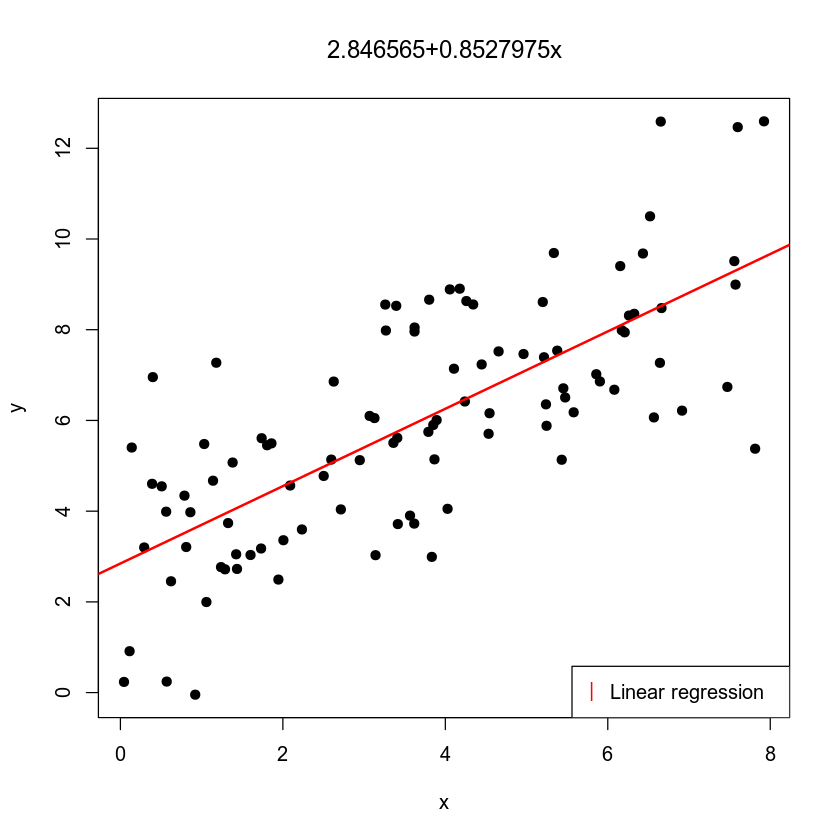

In [4]:
set.seed(31)                       # Ensure reproducible results

N <- 100                           # Sample size
minimum <- 0                       # Minimum value. Left limit.
maximum <- 8                       # Maximum value. Right limit.
x <- runif(N, minimum, maximum)    # Random vector of legth N containg numbers in (minimum, maximum)

a <- 1                             # Set parameter a
b <- 2                             # Set parameter b
sigma <- 2                         # Set standard deviation

# Invoke model function.
y <- my_model(x = x, a = a, b = b, sigma = sigma) 

# Compute points that minimice the cost function. Regression coefficients.
alphas <- minimice_costs(x, y)                    

# Plot predicted values (y) against feature vector (x)
plot(y ~ x, 
     pch = 19,
     col = 'black',
     main = substitute(paste(a0,'+', a1, 'x'), 
                        list(a0 = alphas[1], a1= alphas[2])))


# Linear regression with proper regression coefficients
abline(a = alphas[1], b = alphas[2],
       col = 'red',
       lwd = 2)

legend("bottomright", legend = "Linear regression", pch = "|", col = "red")

Nótese que para calcular los $\hat{\alpha}$ hemos usado la función ` minimice_costs()`. Si bien, obtenemos lo mismo que con la función más general ` minimice_costs_general()` (salvo errores de redondeo):

In [5]:
alphas # Using particular function

X <- cbind(rep(1, length(x)), x)
minimice_costs_general(X, y) # Using general function

[1] 2.8465652 0.8527975

,2.8465652
x,0.8527975


Comparemos los resultados que hemos obtenidos en este desarrolllo analítico con los que nos devolvería `R` con la función `lm()`.

La recta de regresión obtenida analiticamente la pintamos en amarillo. Establecemos un grosor excesivo
para que se marque bien. A continuación, pintamos la recta de regresión obtenida con `lm()` en color rojo sobre la anterior.

Como esperábamos, esta se sitúa sobre la recta amarilla. 

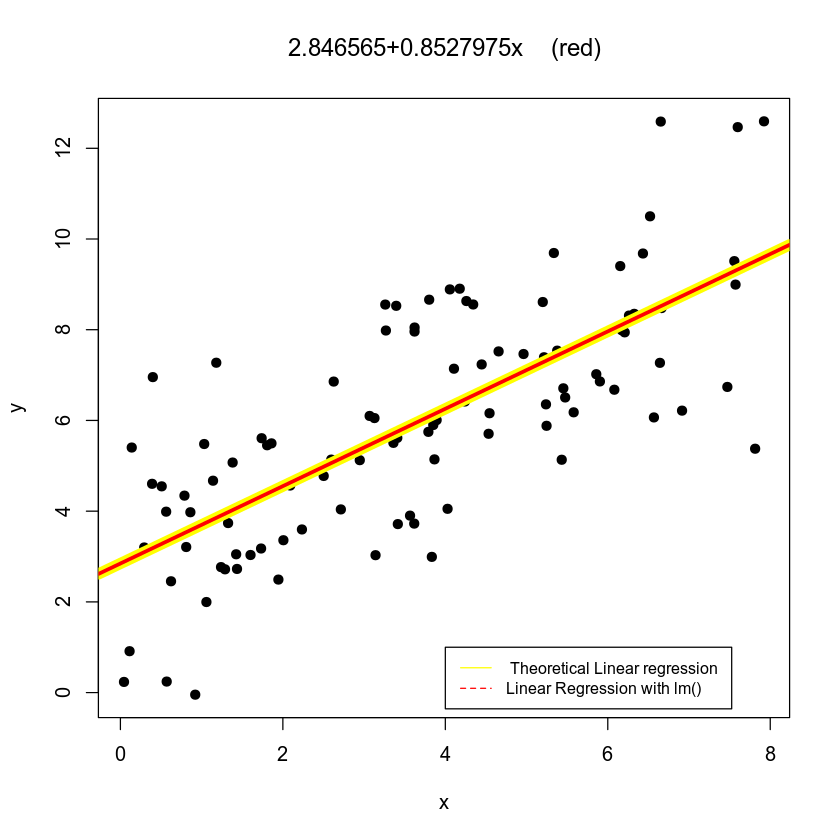

In [6]:
# Plot predicted values (y) against feature vector (x)
plot(y ~ x, 
     pch = 19,
     col = 'black',
     main = substitute(paste(a0,'+', a1, 'x', '    (red)'), 
                        list(a0 = alphas[1], a1= alphas[2])))           


# Linear regression y = alpha_0 + alpha_1 * x. Use proper regression coefficients
abline(a = alphas[1], b = alphas[2],
       col = 'yellow',
       lwd = 9)

# Linear regression with lm
abline(lm(y ~ x), 
       col = 'red',
       lwd = 3)
     
legend(4, 1,  legend=c(" Theoretical Linear regression", "Linear Regression with lm()"),
       col=c("yellow", "red"), lty=1:2, cex=0.8)

<font color='blue'>***4.- Construye una función que calcule la matriz de covarianza asociada al ajuste lineal anterior. Utilízala con los vectores “x” e “y” anteriores y calcula dicha matriz para ese caso particular.***</font>

Sea
$$\hat{\alpha} = (X^{T}X)^{-1}X^{T}y,$$
el vector de coeficientes de regresión (valores particulares de $\alpha$) que minimizan la función de coste.

Tal y como dedujimos en clase (omito pasos), tenemos:
$$Cov(\hat{\alpha}) = [(X^{T}X)^{-1}X^{T}]Cov(y)[(X^{T}X)^{-1}X^{T}]^{T}.$$

Esto se debe a:
* Asumimos $x$ fija, luego su varianza es 0;
* las medias de $y$ son independientes para cada valor de $x$; 
* la varianza de $y$ es la misma para todas las $p(y|x)$.

Siendo $I$ la matriz identidad, $\sigma^{2}$ la varianza poblacional, podemos reescribir la expresión anterior como:
$$Cov(\hat{\alpha}) = [(X^{T}X)^{-1}X^{T}]\sigma^{2}I[(X^{T}X)^{-1}X^{T}]^{T}.$$

Empleando las propiedades habituales de las matrices, tenemos:
$$\begin{align}
Cov(\hat{\alpha}) &= [(X^{T}X)^{-1}X^{T}]\sigma^{2}I[(X^{T}X)^{-1}X^{T}]^{T} \\
                  &= [(X^{T}X)^{-1}X^{T}][(X^{T}X)^{-1}X^{T}]^{T}\sigma^{2}I \\
                  &= [(X^{T}X)^{-1}X^{T}][(X^{T})^{T}((X^{T}X)^{-1})^{T}]\sigma^{2}I \\
                  &= (X^{T}X)^{-1}X^{T}X((X^{T}X)^{-1})^{T}\sigma^{2}I \\
                  &= I((X^{T}X)^{-1})^{T}\sigma^{2}I \\
                  &= ((X^{T}X)^{T})^{-1}\sigma^{2}I \\
                  &= (X^{T}(X^{T})^{T})^{-1}\sigma^{2}I \\
                  &= (X^{T}X)^{-1}\sigma^{2}I \\
                   &= (X^{T}X)^{-1}\sigma^{2} 
\end{align}$$

Es decir, la varianza de los coeficientes de regresión $\alpha$ es independiente de los valores particulares $\hat{\alpha}$, pues no son en sí una variable aleatoria. 

In [7]:
covariance_matrix <- function(X, sigma){
    
    #
    # Calculates covariance matrix of \alpha = (X^{T}X)^{-1}X^{T}y
    #
    # @description Calculates covariance matrix of \alpha = (X^{T}X)^{-1}X^{T}y
    #
    # @param X numeric array. Features array
    # @param sigama. Population sd
    #
    # @return numeric array. Covariance matrix.
    #
    
    return(solve(t(X) %*% X) * sigma^2)
}

In [8]:
# Calcultate covariance matrix
cov_mat <- covariance_matrix(X, sigma)
cov_mat

,,x
,0.15133891,-0.030584272
x,-0.03058427,0.008401355


<font color='blue'>***5.- Crea una función como la del apartado 1 donde se añadan 3 parámetros más (c, d, e) y en dónde todo sea igual salvo que media = a + b*x + c*x^2 + d*x^3 + e*x^4***</font>


Tenemos un modelo en el que $p(y|x)$ tiene la siguiente forma:
$$p(y|x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}\frac{(y-(a \cdot x + b+ c\cdot x^2 + d\cdot x^3 + e\cdot x^4))^{2}}{\sigma^{2}}}$$

In [9]:
my_model_2 <- function(x, a, b, c, d, e, sigma){
    
    #
    # Polynomial model with one feature: y = f(x) = a * x + b+ c*x^2 + d*x^3 + e*x^4.
    #
    # @description Plynomial model. 
    #
    # @param x numeric vector. Features vector. Independent variable.
    # @param a float. 
    # @param b float.
    # @param c float.
    # @param d float.
    # @param e float.
    # @param sigma float. Standard deviation
    #
    # @return numeric vector. Model result. Dependent variable.
    #
        
    return(rnorm(length(x), 
                 mean = a + b * x + c * (x ^ 2) + d * (x ^ 3) + e * (x ^ 4), 
                 sd = sigma))
}

<font color='blue'>***6.- Repite 3 y 4 con la función generada en 5 y usando: a = 107, b=-176, c=86, d=-16, e=1***</font>


En este caso no tiene sentido aplicar un modelo de regresión lineal sin hacer ninguna transformación. 

La relación entre la variable dependiente $y$ y el vector de características $x$ es de tipo polinómico:
$$ y = f(x) = a + b\cdot x + c\cdot x^{2} + d\cdot x^{3} + e\cdot x^{4}. $$


Tal y como vimos en la clase teórica, dada una relación $y = f(x) = \alpha_{0} + \alpha_{1}\cdot x + \alpha_{2}\cdot x^{2} +... + \alpha_{M}\cdot x^{M}$  expandimos artificialmente la dimensión de $x$ añadiendo potencias de las propias $x$. En forma matricial, el modelo puede expresarse como:

$$\begin{bmatrix}
y_{1} \\ y_{2} \\ \vdots \\ y_{N}
\end{bmatrix} = 
\begin{bmatrix} 
	1 & x_{1} & x_{1}^{2} & \dots & x_{1}^{M} \\
	1 & x_{2} & x_{2}^{2} & \dots & x_{2}^{M} \\
    \vdots & \vdots       & \vdots &  \vdots& \vdots  \\
	1 & x_{N} & x_{N}^{2} & \dots & x_{N}^{M} \\
	\end{bmatrix}
    \begin{bmatrix} 
	\alpha_{0}\\
	\alpha_{1}\\
    \alpha_{2}\\
    \vdots \\
    \alpha_{N}\\
	\end{bmatrix}
$$
es decir:
$$ y= X\alpha$$


Para hallar los coeficientes que minimizan la función de coste (cuadrado de la distancia euclidea), empleamos:
$$ \hat{\alpha} = (X^{T}X)^{-1}X^{T}y$$
que es el vector que contiene los coeficientes que minimizan el polinomio de regresión.

In [10]:
a <- 107     # Set parameter a
b <- - 176   # Set parameter b
c <- 86      # Set parameter c
d <- - 16    # Set parameter d
e <- 1       # Set parameter e

# We use the same feature vector/independent variable: x

# Invoke model function.
y_2 <- my_model_2(x = x, a = a, b = b, c = c, d = d, e = e, sigma = sigma) 

In [11]:
# Features matrix
X_2 <- cbind(rep(1, length(x)), x, x^2, x^3, x^4)

# Calculate alphas that minimize cost function. Regression coefficients
alphas_pol <- minimice_costs_general(X_2, y_2)

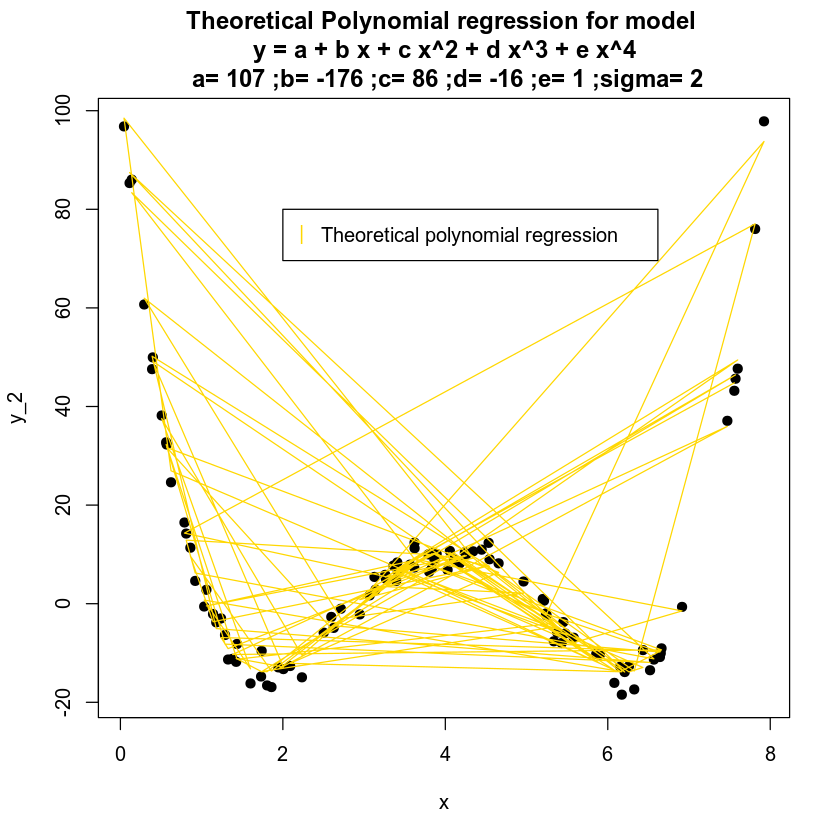

In [12]:
# Select alphas. Regression coefficients
alpha_0 <- alphas_pol[1]
alpha_1 <- alphas_pol[2]
alpha_2 <- alphas_pol[3]
alpha_3 <- alphas_pol[4]
alpha_4 <- alphas_pol[5]

# Calculate polynomial regression curve
res <- alpha_0 + alpha_1*x + alpha_2*x^2 + alpha_3*x^3 + alpha_4*x^4

# Plot points
plot(y_2 ~ x, pch = 19,
    main = paste('Theoretical Polynomial regression for model', '\n', 
                 'y = a + b x + c x^2 + d x^3 + e x^4' , '\n',
                'a=',a,';b=',b,';c=',c,';d=',d,';e=',e,';sigma=',sigma))

# Plot regression
lines(res ~ x, col = "gold")


legend(2, 80, legend = "Theoretical polynomial regression", pch = "|", col = "gold")

Podemos comparar los resultados obtenidos mediante el desarrollo teórico que hemos hecho con lo que nos devolvería la función `lm()` de `R` empleandola bien y no como hemos hecho en celdas anteriores. 

Para ello, emplearemos `lm(y_2 ~ poly(x, 4))`. De este modo, con `poly(x, 4)`, estamos indicando que no saque valores para una recta sino un polinomio de grado 4. Empleamos que es de grado 4 por que así nos lo indica el enunciado.

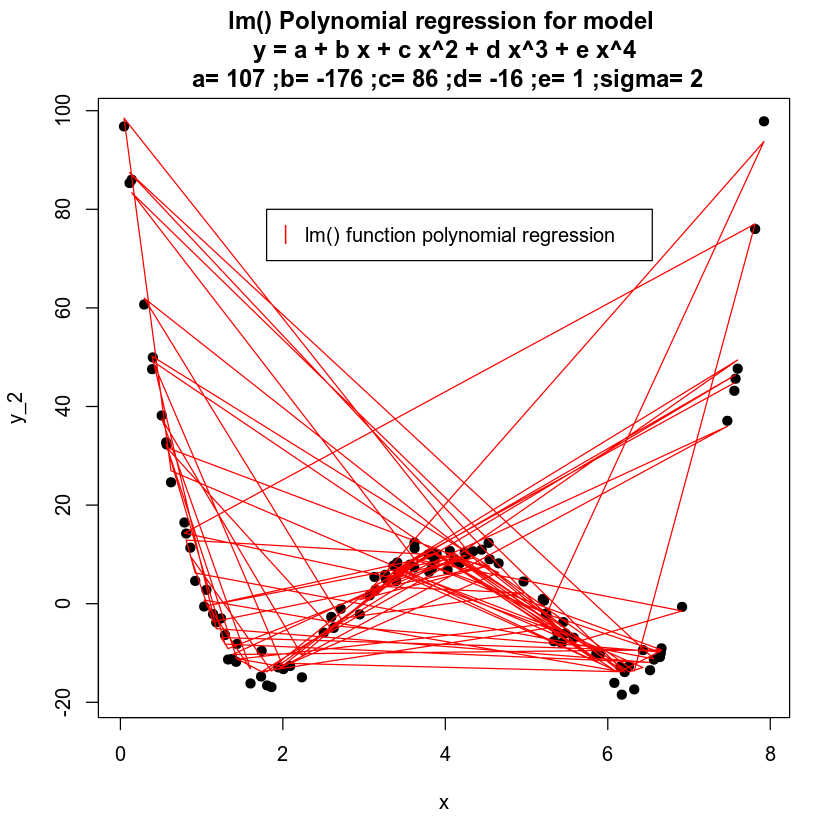

In [13]:
#3 Calculate curve with lm()
polynomial_regression <- lm(y_2 ~ poly(x, 4))

# Plot points
plot(y_2 ~ x, pch = 19,
     main = paste('lm() Polynomial regression for model', '\n', 
                 'y = a + b x + c x^2 + d x^3 + e x^4' , '\n',
                 'a=',a,';b=',b,';c=',c,';d=',d,';e=',e,';sigma=',sigma))

# Plot regression curve
lines(fitted(polynomial_regression) ~ x, col = "red")


legend(1.8, 80, legend = "lm() function polynomial regression", pch = "|", col = "red")

A simple vista, parece similar. Pero hemos de cerciorarnos que los resultados con el método teórico y los obtenidos con las funciones predefinidad de `R` son iguales o, al menos, que no difieren en gran medida. 

In [14]:
# Our results where stores in variable: `res`
# Compare with results obtaines with R functions: `fitted(fm)`
print(paste('Maximum difference', max(res - fitted(polynomial_regression))))

[1] "Maximum difference 3.47361250874201e-10"


Si comparamos elemento a elemento:

In [15]:
any((res == fitted(polynomial_regression)) == T)

[1] FALSE

obtenemos que no hay ningún elemento igual, pero puede deberse simplemente a errores de precisión, pues la máxima diferencia es del orden de ^-10. Podemos comparar algunos elementos a simple vista.

In [16]:
head(res)
head(fitted(polynomial_regression))

[1] 10.084851 49.437929  7.202628  6.989040 44.793431  9.008435

1         2         3         4         5         6 
10.084851 49.437929  7.202628  6.989040 44.793431  9.008435

Si quisiésemos mostrar el resultado obtenido con el método teórico en una gráfica más adecuada:

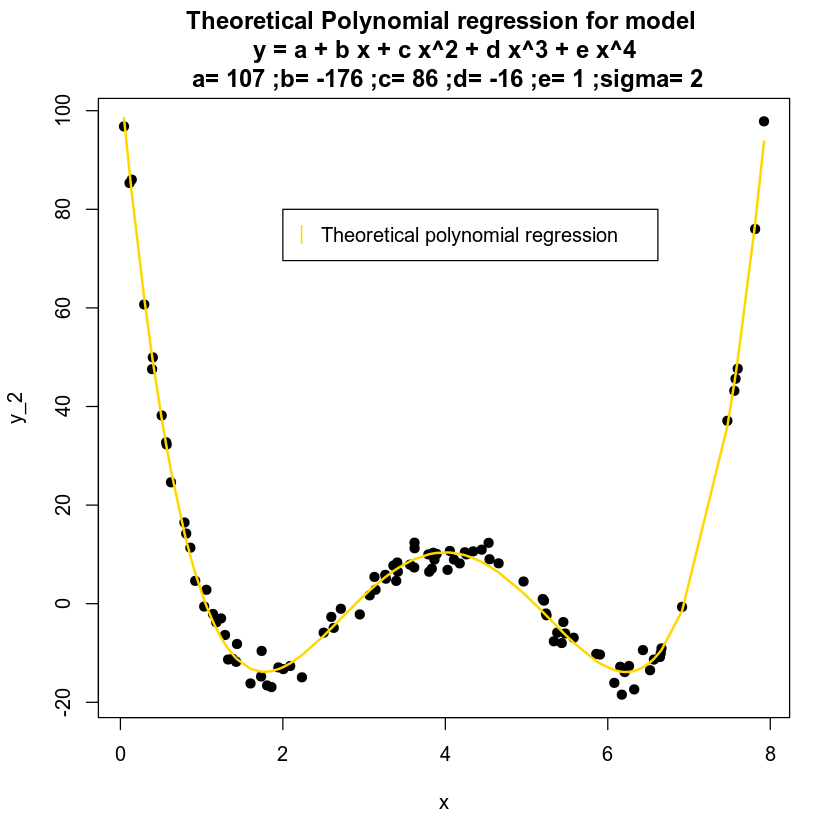

In [17]:
plot(y_2 ~ x, pch = 19,
      main = paste('Theoretical Polynomial regression for model', '\n', 
                 'y = a + b x + c x^2 + d x^3 + e x^4' , '\n',
                'a=',a,';b=',b,';c=',c,';d=',d,';e=',e,';sigma=',sigma))
lines(sort(x), res[order(x)], col='gold', lwd = 2) 
legend(2, 80, legend = "Theoretical polynomial regression", pch = "|", col = "gold")

Podemos ayudarnos de `ggplot()` para dibujar los resultados obtendos con las funciones de `R`.

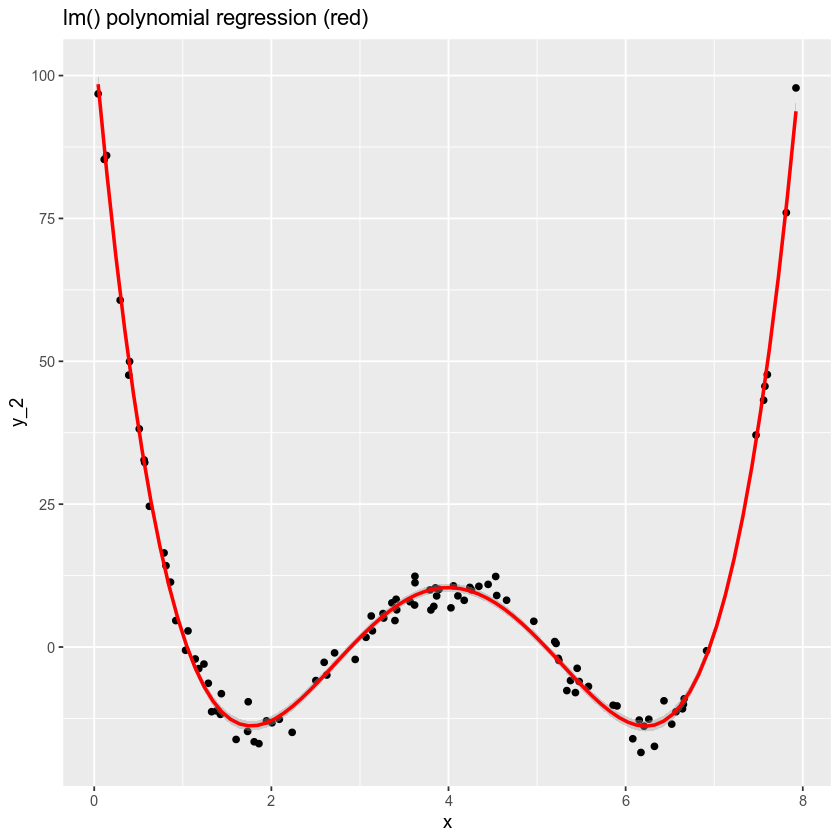

In [18]:
library(ggplot2)
p<-ggplot(data = data.frame(x=x, y=y_2), aes(x=x, y=y_2)) + 
          geom_point() +
          stat_smooth(method='lm', formula = y_2 ~ poly(x,4), size = 1, col = 'red') 

p+ggtitle("lm() polynomial regression (red)")

Podemos comparar las dos curvas en una misma imagen. 

Para ello, mostramos los puntos en un tamaño más grade.

Pintamos el polinomio de regresión obtenido con los resultados teóricos en color amarillo.

Pintamos el polinomio de regresión obtenido con las funciones propias de `R` en color rojo.

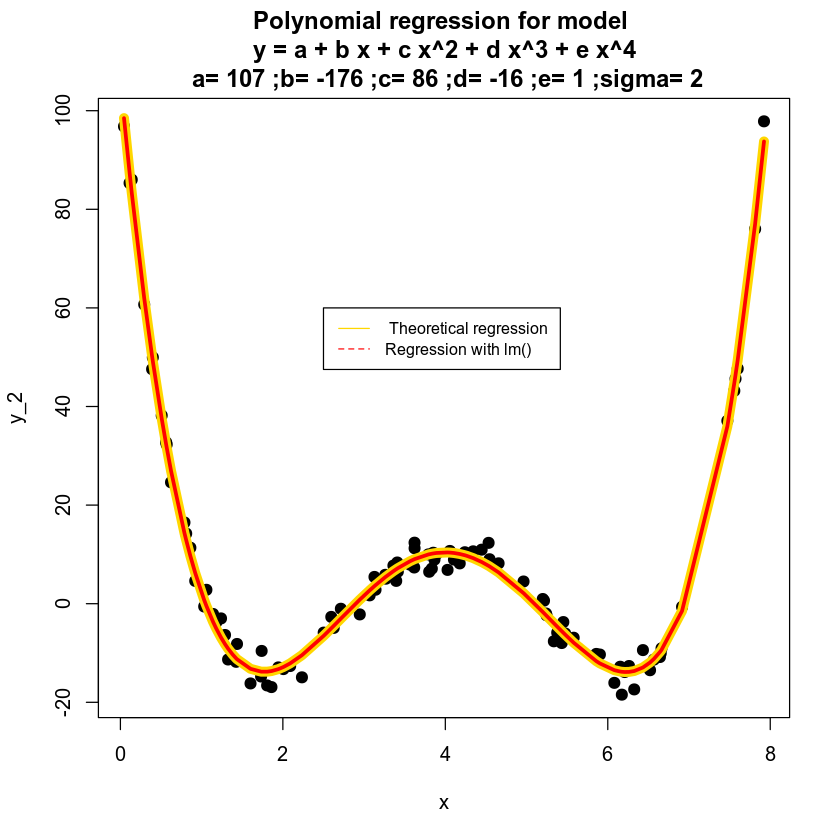

In [19]:
plot(y_2 ~ x, pch = 19, cex = 1.2,
     main = paste('Polynomial regression for model', '\n', 
                 'y = a + b x + c x^2 + d x^3 + e x^4' , '\n',
                'a=',a,';b=',b,';c=',c,';d=',d,';e=',e,';sigma=',sigma))                                                 # Plot poiunts
lines(sort(x), res[order(x)], col = 'gold', lwd = 8)                                # Plot analytical/theoretical results
lines(sort(x), fitted(polynomial_regression)[order(x)], col = "red", lwd = 3)       # PLot results with lm

legend(2.5, 60,  legend=c(" Theoretical regression", "Regression with lm()"),
       col=c("gold", "red"), lty=1:2, cex=0.8)

Calculamos ahora la matriz de covarianzas.

In [20]:
# Calculate covariance matrix
covariance_matrix(X_2, sigma)

,,x,,,
,0.958780407,-1.47971155,0.65350907,-0.109614121,0.0061983822
x,-1.479711549,2.93956842,-1.43957021,0.255943874,-0.0150318361
,0.653509074,-1.43957021,0.75031240,-0.139113327,0.0084199801
,-0.109614121,0.25594387,-0.13911333,0.026598259,-0.0016477863
,0.006198382,-0.01503184,0.00841998,-0.001647786,0.0001039691
